# Questions to Be Aanswered

Q1- Are there  NAN or other unwanted values to be cleaned
Q2- Which quarter of the year have the higher consumption
Q3- Which meter have the higher consumption
Q4 -Analysis per month
Q5- Analysis per week day
Q6- Analysis per week
Q7 What is the relationship between global active power and other meters


In [51]:
# import libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


## **Load the data into the main dataframe and print out a few lines.**


In [52]:

df = pd.read_csv('02 Household Power Consumption.zip', sep=';', 
                 header=[0],
                 low_memory=False, na_values=['nan','?',''])


In [53]:
#show the first 5 columns in the Dataframe
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.0,1.0,17.0


In [54]:
# Add date and time coulmn named Snapshot Date
# Add day name coulmn named Week Day as string type
#Add Month Name coulmn named Month Name


In [55]:
df['Snapshot Date'] = df.Date.astype(str) + ' ' + df.Time.astype(str)
df['Snapshot Date'] = pd.to_datetime(df['Snapshot Date'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
df.drop(['Date', 'Time'], axis=1, inplace=True)

df['Week Day']=pd.to_datetime(df['Snapshot Date']).dt.day_name()

df['Month Name']=pd.to_datetime(df['Snapshot Date']).dt.month_name()

df['Week Day'].astype(str)


0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
            ...   
185706     Tuesday
185707     Tuesday
185708     Tuesday
185709     Tuesday
185710     Tuesday
Name: Week Day, Length: 185711, dtype: object

In [56]:
# Rename Dataset Columns 
df.rename(columns={'Global_active_power':'Global_active_power','Sub_metering_1': 'Kitchen_Consumption','Sub_metering_2':'Laundry_Room_Consumption','Sub_metering_3':'Heater_Air_Condition_Consumption'}, inplace=True)

In [57]:
#show the first 5 columns in the Dataframe
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_Consumption,Laundry_Room_Consumption,Heater_Air_Condition_Consumption,Snapshot Date,Week Day,Month Name
0,4.216,0.418,234.840,18.400,0.0,1.0,17.0,2006-12-16 17:24:00,Saturday,December
1,5.360,0.436,233.630,23.000,0.0,1.0,16.0,2006-12-16 17:25:00,Saturday,December
2,5.374,0.498,233.290,23.000,0.0,2.0,17.0,2006-12-16 17:26:00,Saturday,December
3,5.388,0.502,233.740,23.000,0.0,1.0,17.0,2006-12-16 17:27:00,Saturday,December
4,3.666,0.528,235.680,15.800,0.0,1.0,17.0,2006-12-16 17:28:00,Saturday,December


In [58]:
# Dataframe dimension
df.shape

(185711, 10)

In [59]:
# print dataframe columns' types
df.dtypes

Global_active_power                         object
Global_reactive_power                      float64
Voltage                                     object
Global_intensity                            object
Kitchen_Consumption                        float64
Laundry_Room_Consumption                   float64
Heater_Air_Condition_Consumption           float64
Snapshot Date                       datetime64[ns]
Week Day                                    object
Month Name                                  object
dtype: object

In [60]:
#convert columns of the dataframe to float 
def function():
    for i in ['Global_active_power', 'Voltage',
       'Global_intensity']:
            df[i]=pd.to_numeric(df[i],errors='coerce')
    df['Other Power'] =  df['Global_active_power'] * 1000/60 - df['Laundry_Room_Consumption'] - df['Kitchen_Consumption'] - df['Heater_Air_Condition_Consumption']
    
function()





In [61]:
#check for the datatype of the dataframe 

df.dtypes

Global_active_power                        float64
Global_reactive_power                      float64
Voltage                                    float64
Global_intensity                           float64
Kitchen_Consumption                        float64
Laundry_Room_Consumption                   float64
Heater_Air_Condition_Consumption           float64
Snapshot Date                       datetime64[ns]
Week Day                                    object
Month Name                                  object
Other Power                                float64
dtype: object

In [62]:
#show ALl columns
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Kitchen_Consumption', 'Laundry_Room_Consumption',
       'Heater_Air_Condition_Consumption', 'Snapshot Date', 'Week Day',
       'Month Name', 'Other Power'],
      dtype='object')

In [63]:
#show ALl columns

df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_Consumption,Laundry_Room_Consumption,Heater_Air_Condition_Consumption,Snapshot Date,Week Day,Month Name,Other Power
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,Saturday,December,52.266667
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,Saturday,December,72.333333
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,Saturday,December,70.566667
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,Saturday,December,71.800000
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,Saturday,December,43.100000


In [64]:
# Check for the range of the values of the Snapshot Date column

minValue =df['Snapshot Date'].min()
print(minValue)
maxValue =df['Snapshot Date'].max()
print(maxValue)

2006-12-16 17:24:00
2007-04-24 16:34:00


In [65]:
# Check for the null values of the Global_active_power column
res = pd.isnull(df['Global_active_power'])
res.shape

(185711,)

## **Check How Many Rows have Null Values for Each Column/Row

In [66]:
# Function for finding all columns that have nan:

def getNanColumns ():
    droping_list_all=[]
    for j in range(0,7):
        if not df.iloc[:, j].notnull().all():
            droping_list_all.append(j) 
        
    return (droping_list_all)



In [67]:
# call function and using the set
vNullColumns = getNanColumns()
print(vNullColumns)

vNullColumnsSet=set(vNullColumns)
print("vNullColumnsSet ", vNullColumnsSet)

[0, 1, 2, 3, 4, 5, 6]
vNullColumnsSet  {0, 1, 2, 3, 4, 5, 6}


In [68]:
# Removing rows contain null values for all its cells
#df= df.dropna(axis=0, how='all')


In [69]:
#Checking for Nan values num in each column
df.isnull().sum()

Global_active_power                 10
Global_reactive_power                9
Voltage                             10
Global_intensity                    11
Kitchen_Consumption                  9
Laundry_Room_Consumption             9
Heater_Air_Condition_Consumption     9
Snapshot Date                        1
Week Day                             1
Month Name                           1
Other Power                         10
dtype: int64

# **Remove Null Values within our dataframe

In [70]:
#filling nan value with mean 

def FillnaValue():
    for j in range(0,7):    
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())
    x = df["Other Power"].mean()
    df["Other Power"].fillna(x, inplace = True)
    df["Week Day"].fillna('Friday', inplace = True)
    df["Month Name"].fillna('January', inplace = True)
    df["Snapshot Date"].fillna(df['Snapshot Date'].min(), inplace = True)  

FillnaValue()

In [71]:
#check null
df.isnull().sum()

Global_active_power                 0
Global_reactive_power               0
Voltage                             0
Global_intensity                    0
Kitchen_Consumption                 0
Laundry_Room_Consumption            0
Heater_Air_Condition_Consumption    0
Snapshot Date                       0
Week Day                            0
Month Name                          0
Other Power                         0
dtype: int64

In [72]:
# Check duplicates
df.duplicated('Snapshot Date').sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
185706    False
185707    False
185708    False
185709    False
185710    False
Length: 185711, dtype: bool>

In [73]:
##**Conclusion:
#    We don't have duplicate snapshots based on the date time 
   

In [74]:
# The nunique() method returns the number of unique values for each column.

print(df.nunique());


Global_active_power                   3608
Global_reactive_power                  391
Voltage                               2241
Global_intensity                       204
Kitchen_Consumption                     72
Laundry_Room_Consumption                80
Heater_Air_Condition_Consumption        22
Snapshot Date                       185710
Week Day                                 7
Month Name                               5
Other Power                           4455
dtype: int64


In [75]:
# show some statistic measures on the dataframe values
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Kitchen_Consumption,Laundry_Room_Consumption,Heater_Air_Condition_Consumption,Other Power
count,185711.000000,185711.000000,185711.000000,185711.000000,185711.000000,185711.000000,185711.000000,185711.000000
mean,1.382547,0.121663,240.641969,5.852523,1.232561,1.783675,6.553521,13.472745
std,1.293234,0.112603,3.168414,5.455890,6.498592,7.162831,8.468804,13.744697
min,0.104000,0.000000,223.490000,0.600000,0.000000,0.000000,0.000000,-1.100000
25%,0.318000,0.000000,238.700000,1.400000,0.000000,0.000000,0.000000,4.566667
50%,1.218000,0.106000,240.820000,5.200000,0.000000,0.000000,0.000000,6.366667
75%,2.062000,0.190000,242.770000,8.600000,0.000000,1.000000,17.000000,18.200000
max,10.670000,0.874000,251.700000,46.400000,77.000000,78.000000,20.000000,124.833333


# Visulalization and Conclusions

<AxesSubplot:ylabel='Global_reactive_power'>

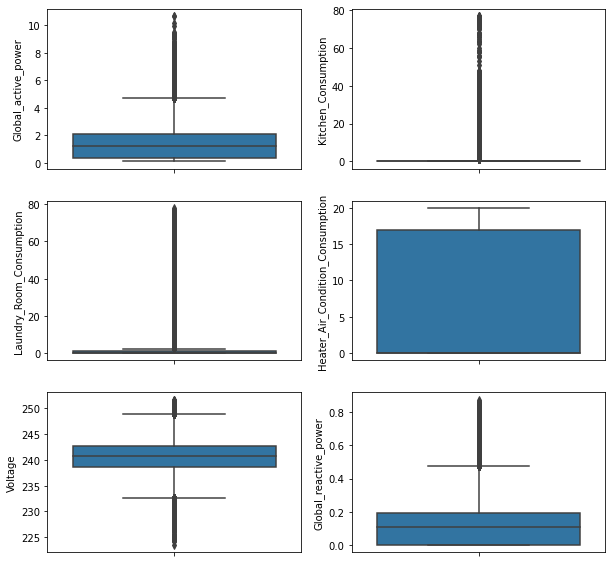

In [76]:
# Plot box plot to show the values distribution
fig, axes = plt.subplots(3, 2,figsize=(10,10))
sns.boxplot(ax=axes[0, 0], data=df, y='Global_active_power')
sns.boxplot(ax=axes[0, 1], data=df, y='Kitchen_Consumption')
sns.boxplot(ax=axes[1, 0], data=df, y='Laundry_Room_Consumption')
sns.boxplot(ax=axes[1, 1], data=df, y='Heater_Air_Condition_Consumption')
sns.boxplot(ax=axes[2, 0], data=df, y='Voltage')
sns.boxplot(ax=axes[2, 1], data=df, y='Global_reactive_power')
#sns.boxplot(y=df['Global_active_power'])

In [77]:
# It can be concluded from the figue that there are outliers that should be taken under consideration

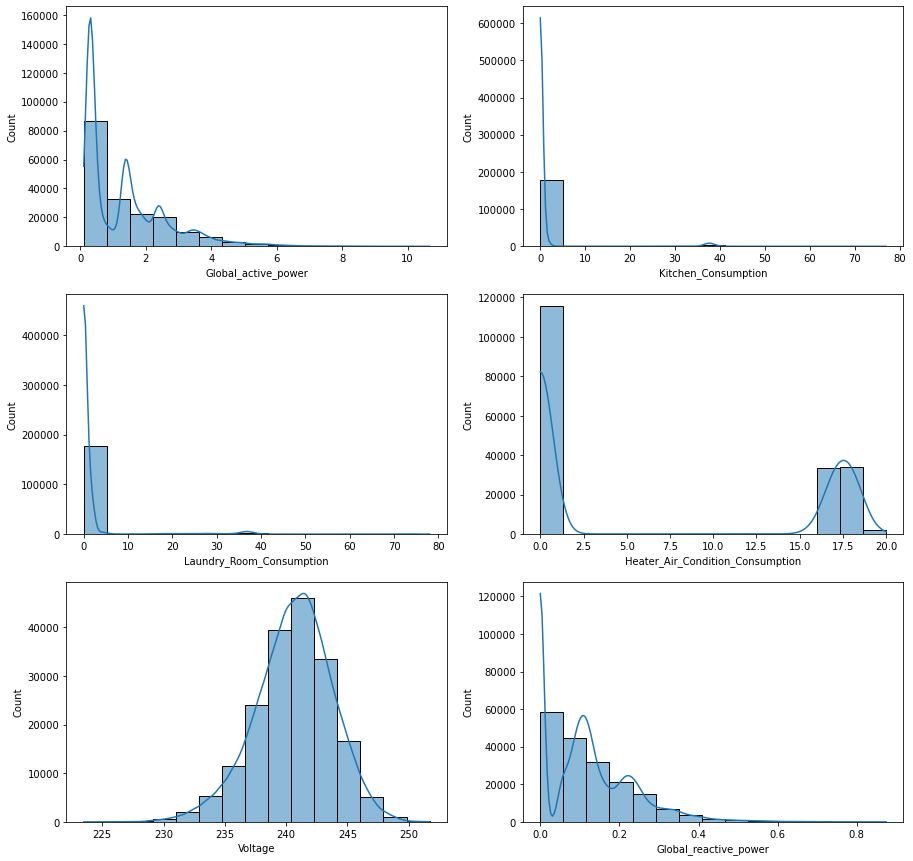

In [78]:
#plot histgram for df columns to show the values distribution
fig, axes = plt.subplots(3, 2,figsize=(15,15))
sns.histplot(ax=axes[0, 0], data=df, x='Global_active_power', bins=15, kde=True)
sns.histplot(ax=axes[0, 1], data=df, x='Kitchen_Consumption', bins=15, kde=True)
sns.histplot(ax=axes[1, 0], data=df, x='Laundry_Room_Consumption', bins=15, kde=True)
sns.histplot(ax=axes[1, 1], data=df, x='Heater_Air_Condition_Consumption', bins=15, kde=True)
sns.histplot(ax=axes[2, 0], data=df, x='Voltage', bins=15, kde=True)
sns.histplot(ax=axes[2, 1], data=df, x='Global_reactive_power', bins=15, kde=True)

plt.show()

array([[<AxesSubplot:title={'center':'Global_active_power'}>,
        <AxesSubplot:title={'center':'Global_reactive_power'}>,
        <AxesSubplot:title={'center':'Voltage'}>],
       [<AxesSubplot:title={'center':'Global_intensity'}>,
        <AxesSubplot:title={'center':'Kitchen_Consumption'}>,
        <AxesSubplot:title={'center':'Laundry_Room_Consumption'}>],
       [<AxesSubplot:title={'center':'Heater_Air_Condition_Consumption'}>,
        <AxesSubplot:title={'center':'Snapshot Date'}>,
        <AxesSubplot:title={'center':'Other Power'}>]], dtype=object)

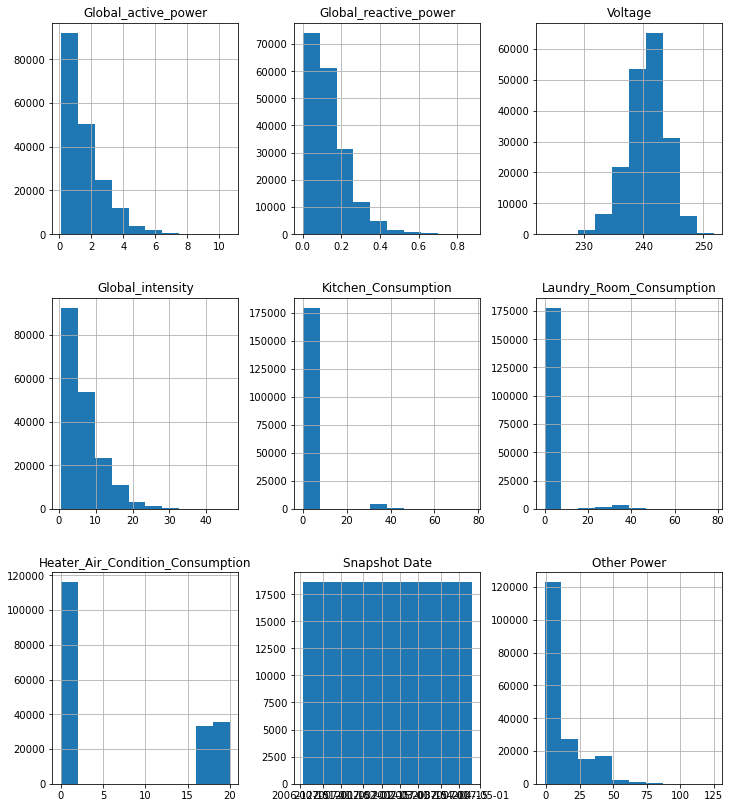

In [79]:
df.hist(figsize = (12,14))

## **Compare the Consumption of Every Meter per Week Day

<AxesSubplot:title={'center':'Power Consumption per Week Day'}, xlabel='Week Day'>

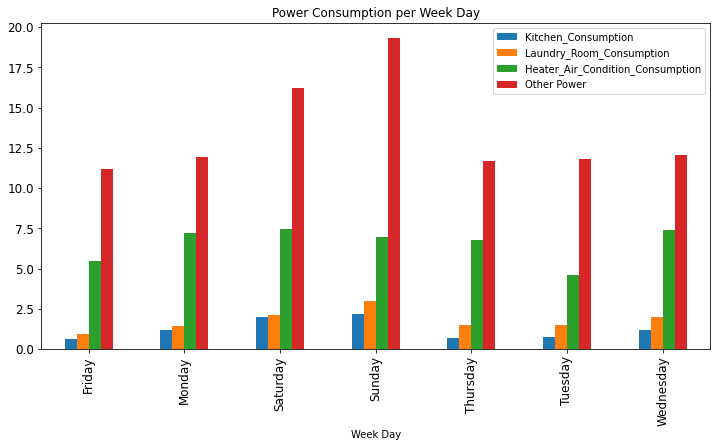

In [80]:
 
d_weekday_power_df = df.groupby(['Week Day'], as_index=0).agg({  'Kitchen_Consumption':'mean','Laundry_Room_Consumption':'mean' ,'Heater_Air_Condition_Consumption':'mean','Other Power':'mean'})
 
d_weekday_power_df.set_index('Week Day').plot.bar(rot='vertical', title='Power Consumption per Week Day', figsize=(12,6), fontsize=12)
 

### **Conclusion
The mean power consumption during the weekend days (Saturday and Sunday) are the highest, which means that people mostly stay at home and use the electrical devices

The Other power metering is the highest one over all days, unfortunately we are not able to tell the reasone because we don't have details about the electrical devices being used.

The laundry room is often used on Sunday.


## **Compare the Consumption of Every Meter per Month


     Week Day  Kitchen_Consumption  Laundry_Room_Consumption  \
0     Friday             0.609120                  0.949115   
1     Monday             1.182675                  1.403034   
2   Saturday             1.988541                  2.095290   
3     Sunday             2.178973                  2.981372   
4   Thursday             0.689928                  1.513933   
5    Tuesday             0.761954                  1.509010   
6  Wednesday             1.173495                  1.994406   

   Heater_Air_Condition_Consumption  Other Power  
0                          5.460437    11.159784  
1                          7.200110    11.946265  
2                          7.482847    16.228243  
3                          6.934527    19.291299  
4                          6.797501    11.663851  
5                          4.606762    11.782572  
6                          7.395988    12.021727  


<AxesSubplot:title={'center':'Power Consumption per Month'}, xlabel='Month Name'>

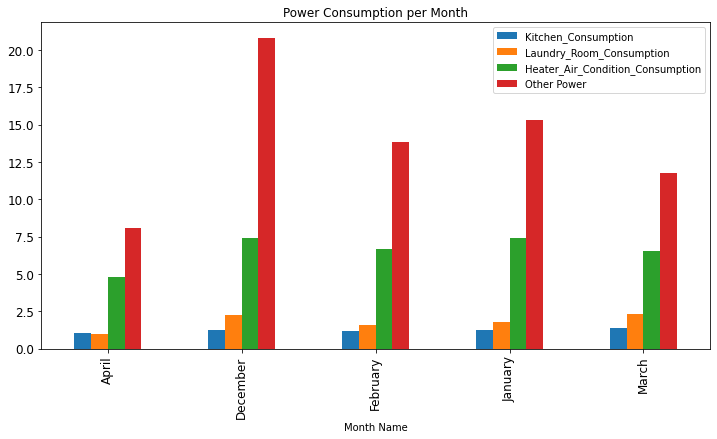

In [81]:
 d_month_power_df = df.groupby(['Month Name'], as_index=0).agg({ 'Kitchen_Consumption':'mean','Laundry_Room_Consumption':'mean' ,'Heater_Air_Condition_Consumption':'mean','Other Power':'mean'})

print('\n', d_weekday_power_df)
 
d_month_power_df.set_index('Month Name').plot.bar(rot='vertical', title='Power Consumption per Month', figsize=(12,6), fontsize=12)
 

### **Conclusion
The higest power consumption are during the winter months (December, January and February nad March).

During the winter months (December, January and February nad March), the use of heater, air condition is increased by around 35-40% compared with April

The Other power metering is the highest one over all months specially in winter, unfortunately we are not able to tell the reasone because we don't have details about the electrical devices being used.


In [82]:
# Copy the dataframe and Reset the index value of it to answer our questions
dfn= df
dfn.reset_index(drop=True)
dfn.set_index('Snapshot Date',inplace=True)
print(dfn)

                     Global_active_power  Global_reactive_power  Voltage  \
Snapshot Date                                                              
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   
...                                  ...                    ...      ...   
2007-04-24 16:30:00                0.320                  0.082   235.19   
2007-04-24 16:31:00                0.328                  0.078   234.53   
2007-04-24 16:32:00                0.344                  0.088   234.90   
2007-04-24 16:33:00                0.416                  0.174   235.29   
2007-04-24 16:34:00                0.408                  0.174   234.82   

           

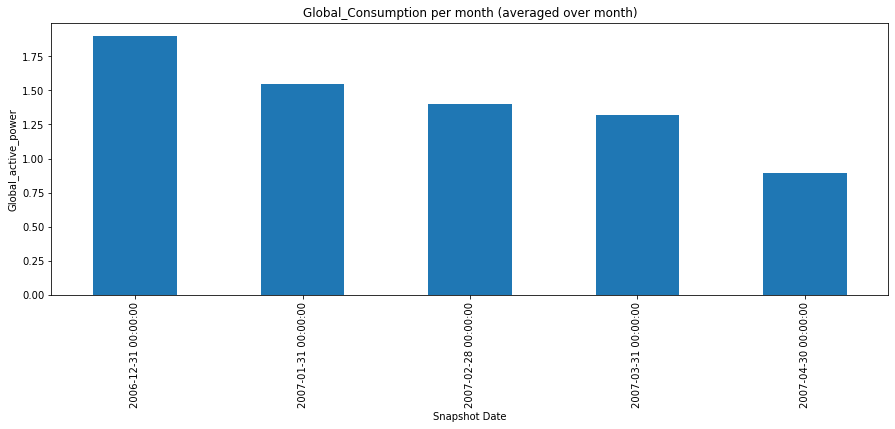

In [83]:
#'Global_Consumption per month averaged over month
dfn['Global_active_power'].resample('M').mean().plot(figsize=(15,5),kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Global_active_power')
plt.title('Global_Consumption per month (averaged over month)')
plt.show()

**Conclusion

The mean power consumption during December was the highest which means that people mostly stay at home and use the electrical devices
heavely so they need to take care of their usage 


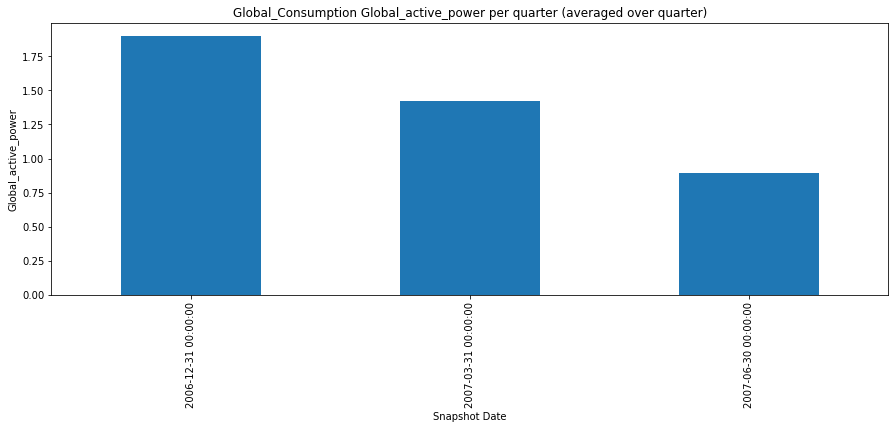

In [85]:
#'Global_Consumption per month (averaged over month
dfn['Global_active_power'].resample('Q').mean().plot(figsize=(15,5),kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Global_active_power')
plt.title('Global_Consumption Global_active_power per quarter (averaged over quarter)')
plt.show()


**Conclusion
Note: Assuming that the data is correct and complete for the whole year, the following can be observed:

The mean power consumption during the seconed quarter of year 2007 was the best and people in the house should take care of their usage of electrinic devices during the first quarter of the year because it was the highest which means that people mostly stay at home and use the electrical devices
heavely so they need to take care of their usage 

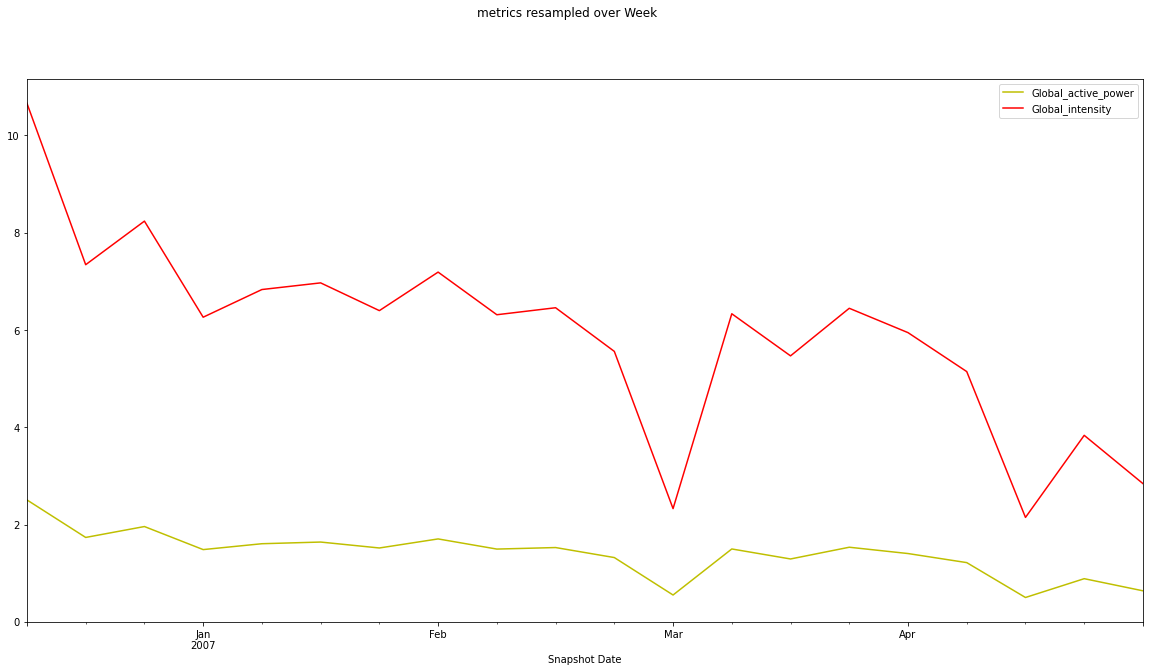

In [87]:
## resampling over week and computing mean
dfn.Global_active_power.resample('W').mean().plot(figsize=(20,10),color='y', legend=True)
dfn.Global_intensity.resample('W').mean().plot(figsize=(20,10),color='r', legend=True)
#dfn.Kitchen_Consumption.resample('W').mean().plot(figsize=(20,10),color='b', legend=True)
#dfn.Laundry_Room_Consumption.resample('W').mean().plot(figsize=(20,10),color='pink', legend=True)
#dfn.Heater_Air_Condition_Consumption.resample('W').mean().plot(figsize=(20,10),color='brown', legend=True)
#dfn.Voltage.resample('W').mean().plot(figsize=(20,10),color='g', legend=True)
plt.suptitle("metrics resampled over Week")
plt.show()


**Conclusion

There is a direct relationship between the weekly consumption of energy and the global intensity. 
It can be noted that it was the lowest during March and the highest during February, so we advise people at home to review their consumption during February

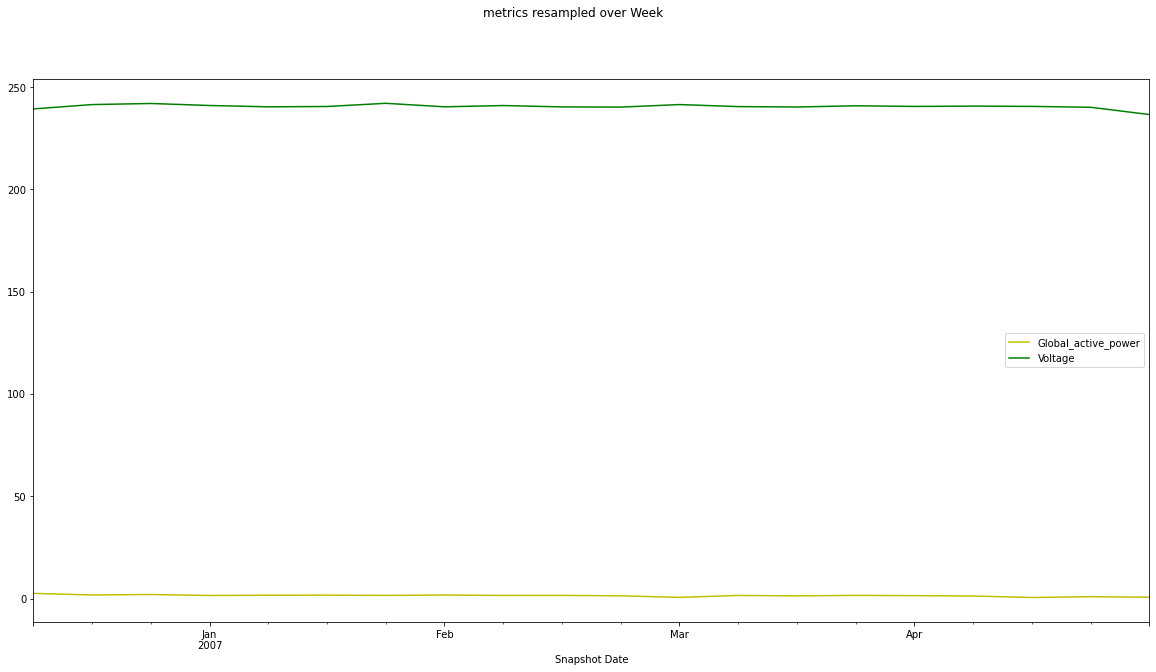

In [89]:
## resampling over week and computing mean
dfn.Global_active_power.resample('W').mean().plot(figsize=(20,10),color='y', legend=True)
#dfn.Global_intensity.resample('W').mean().plot(figsize=(20,10),color='r', legend=True)
#dfn.Kitchen_Consumption.resample('W').mean().plot(figsize=(20,10),color='b', legend=True)
#dfn.Laundry_Room_Consumption.resample('W').mean().plot(figsize=(20,10),color='pink', legend=True)
#dfn.Heater_Air_Condition_Consumption.resample('W').mean().plot(figsize=(20,10),color='brown', legend=True)
dfn.Voltage.resample('W').mean().plot(figsize=(20,10),color='g', legend=True)
plt.suptitle("metrics resampled over Week")
plt.show()

**Conclusion

There is a direct relationship between the weekly consumption of energy and the global voltage. 


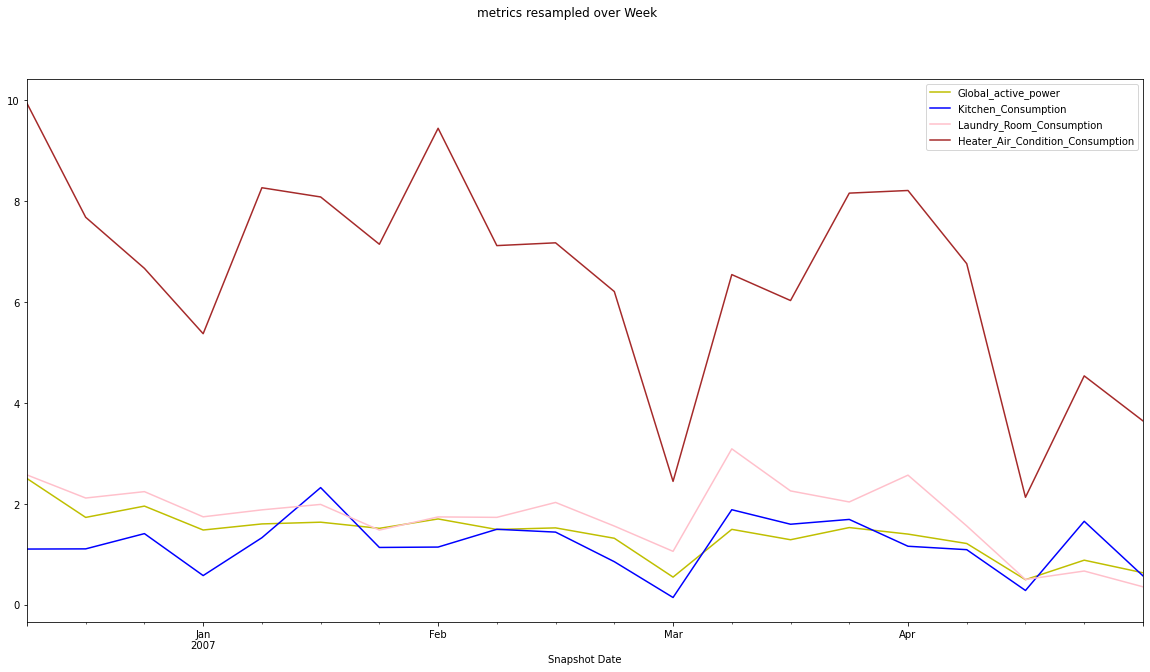

In [91]:
## resampling over week and computing mean
dfn.Global_active_power.resample('W').mean().plot(figsize=(20,10),color='y', legend=True)
#dfn.Global_intensity.resample('W').mean().plot(figsize=(20,10),color='r', legend=True)
dfn.Kitchen_Consumption.resample('W').mean().plot(figsize=(20,10),color='b', legend=True)
dfn.Laundry_Room_Consumption.resample('W').mean().plot(figsize=(20,10),color='pink', legend=True)
dfn.Heater_Air_Condition_Consumption.resample('W').mean().plot(figsize=(20,10),color='brown', legend=True)
#dfn.Voltage.resample('W').mean().plot(figsize=(20,10),color='g', legend=True)
plt.suptitle("metrics resampled over Week")
plt.show()

**Conclusion:

There is a direct relationship between the weekly consumption of energy and the global intensity, voltage and other measures. 
It can be noted that it was the the use of heater and air condition was the highest during February thus power consumption was also the highest in this month.
heater and air condition companies can take a benifet of this note and make more offers during February. 
It can be noted that it was the the use of laundery was the highest during Mars weeks thus power consumption was also in this month.
heater and air condition companies can take a benifet of this note and make more offers during February. 
Laundry soap and washing machine companies can take a a benifet of this note too.
In overall taking a benefit of noticeing that people stay more at home during march and february.